In [45]:
# Memasukkan library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('JumlahHariHujan2022.csv')

In [47]:
df.head(20)

,Bulan,Stasiun Meteorologi Jatiwangi,Stasiun Meteorologi Citeko,Stasiun Klimatologi Bogor,Stasiun Geofisika Bandung
0,Januari,26,22,30,13
1,Februari,26,27,23,22
2,Maret,26,26,28,22
3,April,26,26,29,27
4,Mei,22,13,25,20
5,Juni,19,24,27,20
6,Juli,13,13,29,14
7,Agustus,7,21,31,10
8,September,10,23,29,18
9,Oktober,22,25,28,22


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Bulan                          12 non-null     object
 1   Stasiun Meteorologi Jatiwangi  12 non-null     int64 
 2   Stasiun Meteorologi Citeko     12 non-null     int64 
 3   Stasiun Klimatologi Bogor      12 non-null     int64 
 4   Stasiun Geofisika Bandung      12 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 608.0+ bytes


In [49]:
df.describe()

,Stasiun Meteorologi Jatiwangi,Stasiun Meteorologi Citeko,Stasiun Klimatologi Bogor,Stasiun Geofisika Bandung
count,12.000000,12.000000,12.000000,12.000000
mean,20.750000,23.000000,27.916667,19.916667
std,6.995128,5.239709,2.151462,5.350588
min,7.000000,13.000000,23.000000,10.000000
25%,17.500000,21.750000,27.750000,17.000000
50%,23.500000,24.500000,28.000000,21.000000
75%,26.000000,26.000000,29.000000,22.500000
max,27.000000,30.000000,31.000000,27.000000


In [50]:
print(df.isnull().sum())

Bulan                            0
Stasiun Meteorologi Jatiwangi    0
Stasiun Meteorologi Citeko       0
Stasiun Klimatologi Bogor        0
Stasiun Geofisika Bandung        0
dtype: int64


Mean Squared Error (Linear Regression): 53.61659302856494


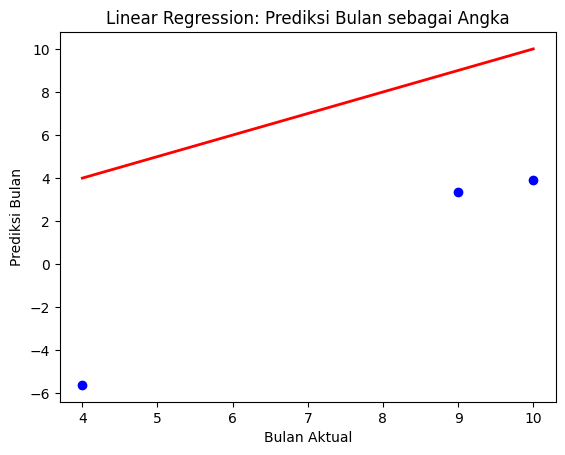

Bulan Prediksi: ['Februari' 'Januari' 'Agustus']
Bulan Aktual: ['November' 'Oktober' 'Januari']


In [56]:
# Mengubah kolom 'Bulan' menjadi numerik dengan LabelEncoder
le = LabelEncoder()
df['Bulan_numeric'] = le.fit_transform(df['Bulan'])

# Variabel input (X) adalah semua kolom stasiun
X = df[['Stasiun Meteorologi Jatiwangi', 'Stasiun Meteorologi Citeko', 'Stasiun Klimatologi Bogor', 'Stasiun Geofisika Bandung']]
# Variabel target (y) adalah 'Bulan_numeric'
y = df['Bulan_numeric']

# Split data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Latih model dengan data latih
lr_pred = lr_model.predict(X_test)  # Prediksi dengan data uji

# Membulatkan hasil prediksi dan membatasi rentangnya antara 0 dan 11 (jumlah bulan - 1)
lr_pred_rounded = np.clip(np.round(lr_pred), 0, len(le.classes_) - 1)

# Evaluasi model Linear Regression dengan Mean Squared Error
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (Linear Regression):", mse)

# Plot hasil prediksi Linear Regression
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Linear Regression: Prediksi Bulan sebagai Angka')
plt.xlabel('Bulan Aktual')
plt.ylabel('Prediksi Bulan')
plt.show()

# Mengembalikan prediksi bulan ke bentuk aslinya (dari angka ke nama bulan)
predicted_months = le.inverse_transform(lr_pred_rounded.astype(int))
actual_months = le.inverse_transform(y_test)

print("Bulan Prediksi:", predicted_months)
print("Bulan Aktual:", actual_months)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi Logistic Regression:  0.0 %


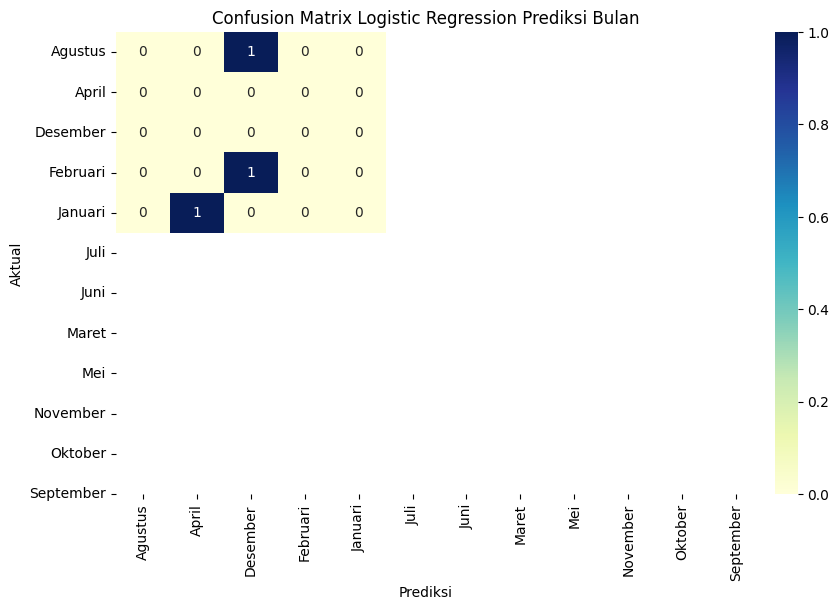

Bulan Prediksi: ['Maret' 'Juni' 'Maret']
Bulan Aktual: ['November' 'Oktober' 'Januari']


In [61]:
# Logistic Regression
log_reg_model = LogisticRegression(max_iter=200)  # Anda dapat menyesuaikan max_iter sesuai kebutuhan
log_reg_model.fit(X_train, y_train)  # Latih model dengan data latih
log_reg_pred = log_reg_model.predict(X_test)  # Prediksi dengan data uji

# Hitung akurasi
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print('Akurasi Logistic Regression: ', log_reg_accuracy * 100, '%')

# Visualisasi hasil prediksi Logistic Regression
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix Logistic Regression Prediksi Bulan")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Mengembalikan prediksi bulan ke bentuk aslinya
predicted_months = le.inverse_transform(log_reg_pred)
actual_months = le.inverse_transform(y_test)

print("Bulan Prediksi:", predicted_months)
print("Bulan Aktual:", actual_months)

Akurasi K-NN:  0.0 %


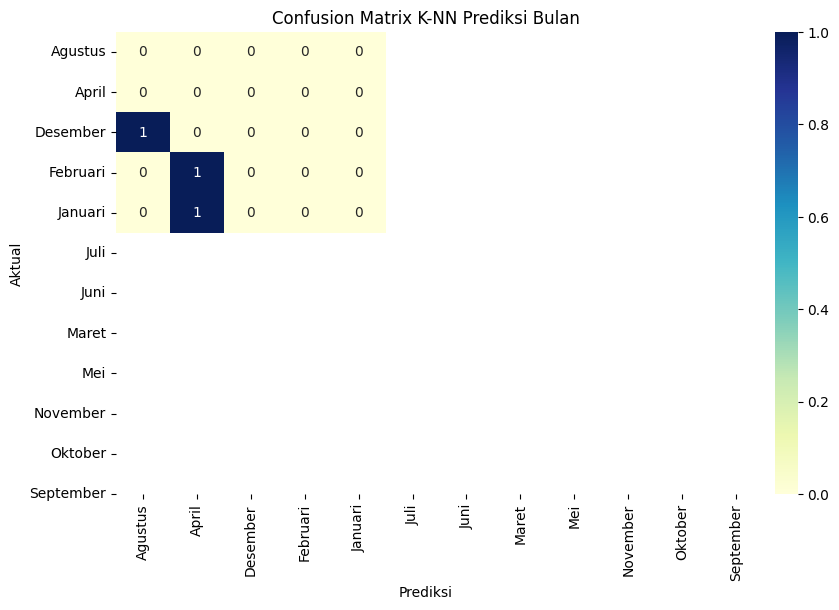

Bulan Prediksi: ['April' 'April' 'Agustus']
Bulan Aktual: ['November' 'Oktober' 'Januari']


In [62]:
# Standarisasi fitur untuk K-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standarisasi data latih
X_test_scaled = scaler.transform(X_test)  # Standarisasi data uji

# K-Nearest Neighbors (K-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Anda dapat menyesuaikan n_neighbors sesuai kebutuhan
knn_model.fit(X_train_scaled, y_train)  # Latih model dengan data latih
knn_pred = knn_model.predict(X_test_scaled)  # Prediksi dengan data uji

# Hitung akurasi
knn_accuracy = accuracy_score(y_test, knn_pred)
print('Akurasi K-NN: ', knn_accuracy * 100, '%')

# Visualisasi hasil prediksi K-NN
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix K-NN Prediksi Bulan")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Mengembalikan prediksi bulan ke bentuk aslinya
predicted_months = le.inverse_transform(knn_pred)
actual_months = le.inverse_transform(y_test)

print("Bulan Prediksi:", predicted_months)
print("Bulan Aktual:", actual_months)

**Dengan menggunakan ke3 model ddisimpulkan bahwa, model akurasi tertinggi adalah Linear Regression dengan prediksi 33%**